<a href="https://colab.research.google.com/github/fordj06/Python_Various/blob/master/practicalAI_L4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression 
In this notebook we will try to understand the basic math behind linear regression and then implement it in Python.  

<img src="https://raw.githubusercontent.com/GokuMohandas/practicalAI/master/images/linear.png" width=250>

$\hat{y} = XW$

*Where*

$\hat{y} =$ prediction | $\in \mathbb{R}^{NX1}$ ($N$ is the number of samples)

$X$ = inputs | $\in \mathbb{R}^{NXD}$ ($D$ is the number of features)

 $W$ = weights | $\in \mathbb{R}^{DX1}$ 





We can use inputs $X$ to predict the output $\hat{y}$ using a linear model. The model will be a line of best fit that minimizes the distance between the predicted and target outcomes. Training data, $X,y$, is used to train the model and learn the weights $W$ using stochastic gradient descent (SDG).

## Training

1. Randomly initialize the models weights.
2. Feed inputs $X$ into the model to receive the predictions $\hat{y}$. 
3. Compare the predictions witht the actual target values using the objective function to determine the loss $J$. A common obkective function for linear regression is the mean squarred error (MSE). The function calculates the difference between the predicted and target values and squares it. 

$MSE = J(\theta) = \frac{1}{2}\sum_{i}(\hat{y}_i - y_i)^2$

4. Calculate the gradient of loss $J(\theta)$ w.r.t to the model weights: 

$J(\theta) = \frac{1}{2}\sum_{i}(\hat{y}_i - y_i)^2 = \frac{1}{2}\sum_{i}(X_iW - y_i)^2 $
 
 $\frac{\partial{J}}{\partial{W}} = X(\hat{y} - y)$

5. Apply backpropagation to update the weights $W$ using a learning rate $\alpha$ and an optimization technique (e.g. stochastic gradient descent). The simplified intuition is that the gradient tells you the direction for how to increase something so subtracting it will help you go the other way since we want to decrease loss $J(\theta)$:
 
$W = W- \alpha\frac{\partial{J}}{\partial{W}}$
6. Repeat steps 2 - 5 until the model performs well.

## Data 

Were going to create some simple dummy data to apply linear regression on. 

In [0]:
from argparse import Namespace
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
# Arguments
args = Namespace (
    seed=1234,
    data_file="sample_data.csv",
    num_samples=100,
    train_size=0.75,
    test_size=0.25,
    num_epochs=100,
)

# Set seed for reproducability
np.random.seed(args.seed)

In [0]:
# Generate the data
def generate_data(num_samples) :
  X = np.array(range(num_samples))
  random_noise = np.random.uniform(-10, 10, size=num_samples)
  y = 3.65 * X + 10 + random_noise       # Add some noise
  return X, y

In [20]:
# Generate random (linear) data 
X, y = generate_data(args.num_samples)
data = np.vstack([X, y]) .T
df = pd.DataFrame(data, columns=['X', 'y'])
df.head()

,X,y
0,0.0,17.679023
1,1.0,18.477211
2,2.0,17.614216
3,3.0,13.655037
4,4.0,15.397673


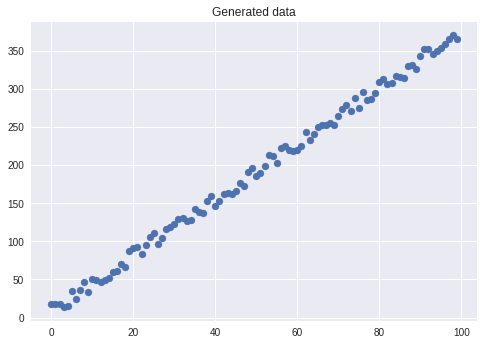

In [21]:
# Scatter plot 
plt.title("Generated data")
plt.scatter(x=df["X"], y=df["y"])
plt.show()

## SciKit-Learn Implementation

**Note**: The `LinearRegression` class in Scikit-learn uses the normal equation to solve the fit. However, we are going to use Scikit-learn's `SGDRegressor` class which uses stochastic gradient descent. We want to use this optimization approach because we will be using this for the models in subsequent lessons.

In [0]:
# Import packages
from sklearn.linear_model.stochastic_gradient import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [23]:
# Creating the data splits 
X_train, X_test, y_train, y_test = train_test_split (
  df["X"].values.reshape(-1,1), df["y"], test_size=args.test_size,
  random_state=args.seed)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (75, 1)
y_train: (75,)
X_test: (25, 1)
y_test: (25,)


We need to standardize our data (zero mean unit varience) in order to properly use SGD and optimize quickly.

In [24]:
# Standardize the data using training data
X_scaler = StandardScaler() .fit(X_train)
y_scaler = StandardScaler() .fit(y_train.values.reshape(-1,1))

# Apply scaler on training and test data
standardized_X_train = X_scaler.transform(X_train)
standardized_y_train = y_scaler.transform(y_train.values.reshape(-1,1)).ravel()
standardized_X_test = X_scaler.transform(X_test)
standardized_y_test = y_scaler.transform(y_test.values.reshape(-1,1)).ravel()


# Check
print ("mean:", np.mean(standardized_X_train, axis=0), 
       np.mean(standardized_y_train, axis=0)) # mean should be ~0
print ("std:", np.std(standardized_X_train, axis=0), 
       np.std(standardized_y_train, axis=0))   # std should be 1

mean: [8.22952817e-17] -1.7115938296304497e-17
std: [1.] 1.0


In [0]:
# Initialize the model 
lm = SGDRegressor(loss="squared_loss", penalty="none", max_iter=args.num_epochs)

In [27]:
# Train 
lm.fit(X=standardized_X_train, y=standardized_y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=100,
       n_iter=None, n_iter_no_change=5, penalty='none', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [0]:
# Predictions (unstandardize them)
pred_train = (lm.predict(standardized_X_train) * np.sqrt(y_scaler.var_)) + y_scaler.mean_
pred_test = (lm.predict(standardized_X_test) * np.sqrt(y_scaler.var_)) + y_scaler.mean_

## Evaluation

There are several techniques to see how well our model performed.

In [0]:
import matplotlib.pyplot as plt

In [30]:
# Train and test MSE 
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)

print("train_MSE: {0:.2f}, test_MSE: {1:.2f}".format(train_mse, test_mse))

train_MSE: 40.38, test_MSE: 30.60


Besides MSE, when we only have one feature, we can visually inspect the element.

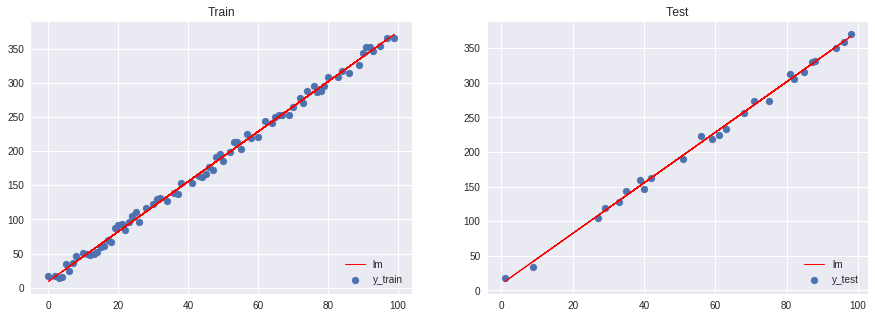

In [31]:
# Figure size
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train, color="red", linewidth=1, linestyle="-", label="lm")
plt.legend(loc='lower right')

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label="y_test")
plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="lm")
plt.legend(loc='lower right')

# Show plots
plt.show()